In [9]:
#import all the modules needed
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import signal
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import get_window

In [10]:
#initial values 
time = 30 
sampling_rate = 10001/30 
#take the time response out of the pickle file (which saved the array values of the time response)
def setting_up(): 
    initial_signal = []
    with (open("t_response.pickle", "rb")) as openfile:
        while True:
            try:
                initial_signal.append(pickle.load(openfile))
            except EOFError:
                break

    initial_signal_array = np.array(initial_signal)
    #change the shape of the array so readable for matplotlib
    initial_signal_reshaped = initial_signal_array.ravel()
    return initial_signal_reshaped

"""t_earthquake = 75
sampling_rate = 500
def setting_up_earthquake (): 
    earthquake_initial = []
    with open("dataset1.csv") as file_name:
        earthquake_initial = np.loadtxt(file_name, delimiter=" ")


    array_t = np.linspace(0, 75, num=len(earthquake_initial))

    return earthquake_initial"""

't_earthquake = 75\nsampling_rate = 500\ndef setting_up_earthquake (): \n    earthquake_initial = []\n    with open("dataset1.csv") as file_name:\n        earthquake_initial = np.loadtxt(file_name, delimiter=" ")\n\n\n    array_t = np.linspace(0, 75, num=len(earthquake_initial))\n\n    return earthquake_initial'

In [11]:
# Known Signal = sum of Sine Waves

"""def generate_sin(A1,w1,A2,w2,A3,w3,t_max):
    t_list_sin = np.linspace(0,t_max,37500)
    sin_sum = A1*np.sin(w1*t_list_sin) + A2*np.sin(w2*t_list_sin) + A3*np.sin(w3*t_list_sin)

    return sin_sum, t_list_sin"""

'def generate_sin(A1,w1,A2,w2,A3,w3,t_max):\n    t_list_sin = np.linspace(0,t_max,37500)\n    sin_sum = A1*np.sin(w1*t_list_sin) + A2*np.sin(w2*t_list_sin) + A3*np.sin(w3*t_list_sin)\n\n    return sin_sum, t_list_sin'

In [12]:
#function to cut the signals to take away only the required time response (which is 4 second in this case)
def choose_range(t, initial_signal): 
    no_of_samples = int((sampling_rate)*t)
    x = np.linspace(0, t, no_of_samples)
    cut_signal = (initial_signal[0:no_of_samples])
    return cut_signal, no_of_samples

In [13]:
#function to get the fft and also the frequency ranges
def applying_fft(signal_analysed, samples): 
    
    # Number of samples in normalized_tone
    N = int (sampling_rate * time)

    yf = fft(signal_analysed)
    xf = fftfreq(N, 1 / sampling_rate)
    return yf, xf


In [14]:
#function to apply the selected window function
def applying_window_function(window_function, signal_analysed, samples, t): 
    y = window_function*signal_analysed
    x = np.linspace(0, t, samples)
    return y,x

In [15]:
#define all the functions for different windowing functions
def bartlett (): 
    #set the no of samples for the windowing function
    bartlett_input = int(time*sampling_rate)
    #get window function
    window = signal.windows.bartlett(bartlett_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = setting_up()
    signal_analysed, samples = choose_range(time, initial_signal)
    x = np.linspace(0, time, samples)
    y_fft, x_fft = applying_fft(signal_analysed, samples)
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    y_window, x_window =applying_window_function (window, signal_analysed, samples, time)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('bartlett windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 5])
    ax4.set_ylim([0, 0.1]) 
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def hann (): 
    #set the no of samples for the windowing function
    hann_input = int(time*sampling_rate)
    #get window function
    window = signal.windows.hann(hann_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = setting_up()
    signal_analysed, samples = choose_range(time, initial_signal)
    x = np.linspace(0, time, samples)
    y_fft, x_fft = applying_fft(signal_analysed, samples)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #plot for unwindowed response
    fig.suptitle("unwindowed response")
    ax1.plot(x, signal_analysed, color ="blue")
    ax1.set_xlabel("time/s")
    ax1.set_ylabel("amplitude/m")
    ax2.plot(x_fft, np.abs(y_fft))
    ax2.set_xlim([0, 5])
    ax2.set_ylim([0, 0.1]) 
    ax2.set_xlabel("frequency/Hz")
    y_window, x_window =applying_window_function (window, signal_analysed, samples, time)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('hann windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 5])
    ax4.set_ylim([0, 0.1]) 
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def hamming (): 
    #set the no of samples for the windowing function
    hamming_input = int(time*sampling_rate)
    #get window function
    window = signal.windows.hamming(hamming_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = setting_up()
    signal_analysed, samples = choose_range(time, initial_signal)
    x = np.linspace(0, time, samples)
    y_fft, x_fft = applying_fft(signal_analysed, samples)
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    y_window, x_window =applying_window_function (window, signal_analysed, samples, time)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('hamming windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 5])
    ax4.set_ylim([0, 0.1]) 
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def flattop (): 
    #set the no of samples for the windowing function
    flattop_input = int(time*sampling_rate)
    #get window function
    window = signal.windows.flattop(flattop_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = setting_up()
    signal_analysed, samples = choose_range(time, initial_signal)
    x = np.linspace(0, time, samples)
    y_fft, x_fft = applying_fft(signal_analysed, samples)
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    y_window, x_window =applying_window_function (window, signal_analysed, samples, time)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('flattop windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 5])
    ax4.set_ylim([0, 0.1]) 
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def exponential (): 
    #set the no of samples for the windowing function
    exponential_input = int(time*sampling_rate)
    tau2 = - (exponential_input-1) / np.log(0.01)
    #get window function
    window = signal.windows.exponential(exponential_input, 0, tau2, False)
    #perform the fft, windowing and fft_windowing
    initial_signal = setting_up()
    signal_analysed, samples = choose_range(time, initial_signal)
    x = np.linspace(0, time, samples)
    y_fft, x_fft = applying_fft(signal_analysed, samples)
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    y_window, x_window =applying_window_function (window, signal_analysed, samples, time)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('exponential windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 5])
    ax4.set_ylim([0, 0.1]) 
    ax4.set_xlabel("frequency/Hz")
    plt.show()

def blackman (): 
    #set the no of samples for the windowing function
    blackman_input = int(time*sampling_rate)
    #get window function
    window = signal.windows.blackman(blackman_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = setting_up()
    signal_analysed, samples = choose_range(time, initial_signal)
    x = np.linspace(0, time, samples)
    y_fft, x_fft = applying_fft(signal_analysed, samples)
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #plot for unwindowed response
    y_window, x_window =applying_window_function (window, signal_analysed, samples, time)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('blackman windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 5])
    ax4.set_ylim([0, 0.1]) 
    ax4.set_xlabel("frequency/Hz")
    plt.show()


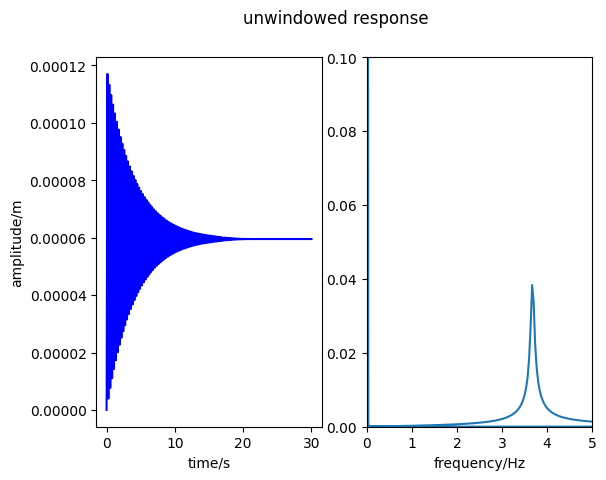

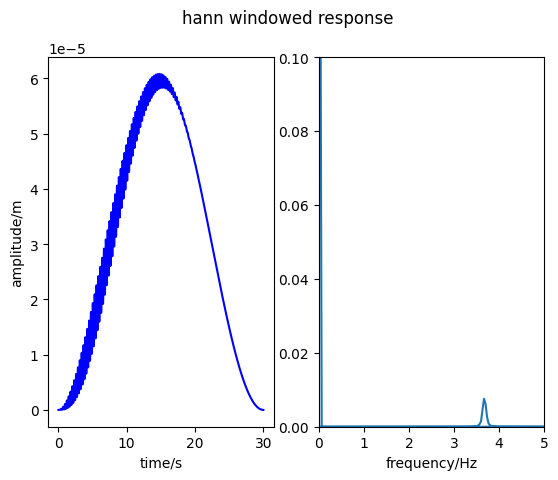

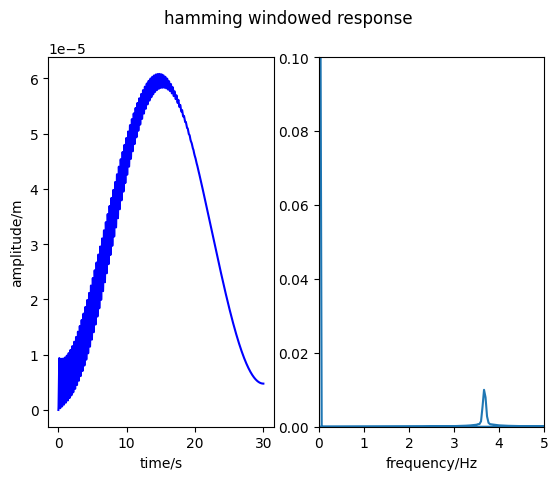

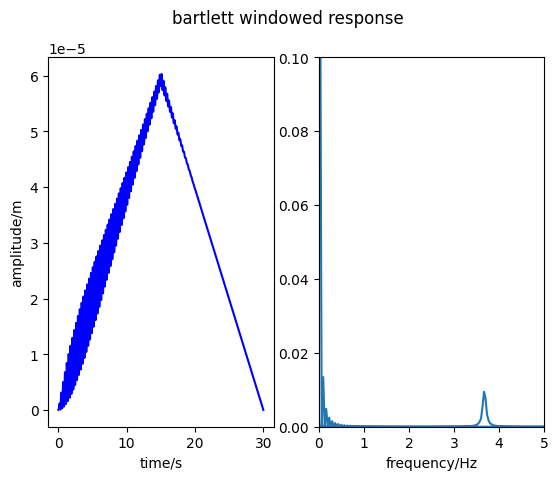

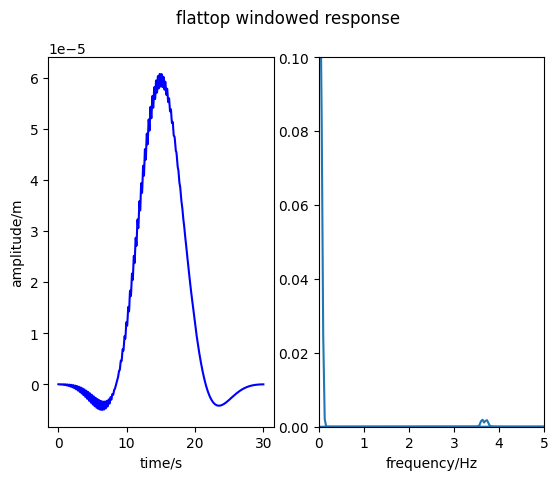

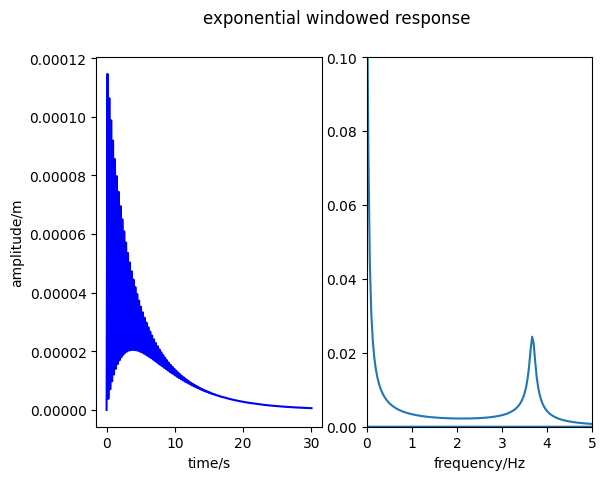

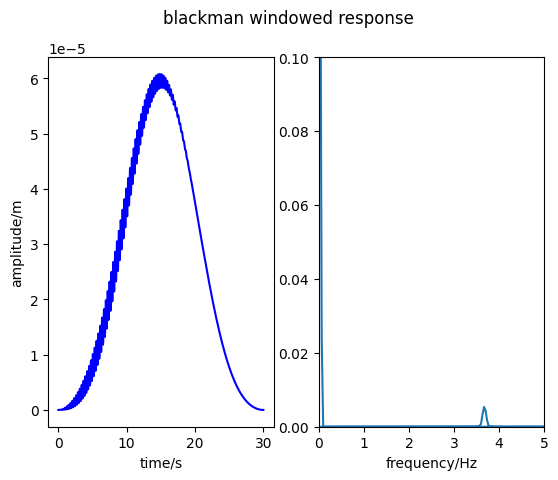

In [16]:
def main(): 
    hann()
    hamming()
    bartlett()
    flattop()
    exponential()
    blackman()

main()

In [18]:
def earthquake_data (): 
    #set the no of samples for the windowing function
    hann_input = int(time*sampling_rate)
    #get window function
    window = signal.windows.hann(hann_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = setting_up()
    signal_analysed, samples = choose_range(time, initial_signal)
    x = np.linspace(0, time, samples)
    y_fft, x_fft = applying_fft(signal_analysed, samples)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #plot for unwindowed response
    fig.suptitle('hann unwindowed response')
    ax1.plot(x, signal_analysed, color ="blue")
    ax1.set_xlabel("time/s")
    ax1.set_ylabel("amplitude/m")
    ax2.plot(x_fft, np.abs(y_fft))
    ax2.set_xlim([0, 5])
    ax2.set_ylim([0, 0.1]) 
    ax2.set_xlabel("frequency/Hz")
    y_window, x_window =applying_window_function (window, signal_analysed, samples, time)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('hann windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    ax4.set_xlim([0, 5])
    ax4.set_ylim([0, 0.1]) 
    ax4.set_xlabel("frequency/Hz")
    plt.show()